# Import Data 

In [ ]:
pip install pandas
pip install numpy
pip install scikit-learn
pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import each dataset (users,contacts,listings) using pandas `read_csv` method

In [2]:
users = pd.read_csv(r"C:\Users\User\Downloads\users.csv")
users.rename(columns = {'id_user_anon':'id_user',
                           'country':'origin_country'}, inplace = True)
users.head()

,id_user,origin_country,words_in_user_profile
0,1d16a001-31a2-494c-a101-1f7b308adc62,FR,0
1,42607e0a-86c0-472e-b633-9e192114e93c,AR,0
2,25f85eb5-a700-44e1-b142-4c076222198d,BR,0
3,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1
4,5d62d35a-7d6d-45dd-ae9b-a5d2f82a7d7b,BR,98


In [3]:
contacts = pd.read_csv(r"C:\Users\User\Downloads\contacts.csv")
contacts.rename(columns = {'id_guest_anon':'id_user',
                           'id_host_anon':'id_host',
                           'id_listing_anon':'id_listing',
                'contact_channel_first':'contact_channel',
                'guest_user_stage_first':'user_type'},inplace= True)
contacts.head()

,id_user,id_host,id_listing,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel,user_type
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40.0,2016-05-05 15:17:40.0,NaN,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25.0,2016-06-23 03:09:26.0,2016-06-23 03:09:33.0,2016-06-23 03:09:33.0,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker


In [4]:
listings = pd.read_csv(r"C:\Users\User\Downloads\listings.csv")
listings.rename(columns = {'id_listing_anon':'id_listing'}, inplace =
                True)
listings.head()

,id_listing,room_type,listing_neighborhood,total_reviews
0,71582793-e5f8-46d7-afdf-7a31d2341c79,Private room,-unknown-,0.0
1,a1a3f728-e21f-4432-96aa-361d28e2b319,Entire home/apt,Copacabana,0.0
2,353a68be-ecf9-4b7b-9533-c882dc2f0760,Entire home/apt,Barra da Tijuca,3.0
3,b9ae1908-0486-40ac-bbcf-bd63ffebfe63,Entire home/apt,Lapa,4.0
4,fa0290ef-7881-4482-8981-8ebb1ce5dbfd,Entire home/apt,-unknown-,0.0


# EDA


#### Users 

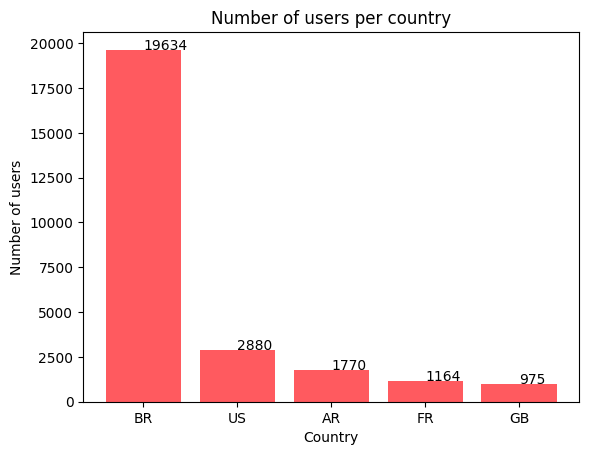

In [5]:
x = users['origin_country'].value_counts().iloc[:5].index
y = users['origin_country'].value_counts().iloc[:5].values

def label(x,y): 
    for i in range(len(x)):
        plt.text(i,y[i], y[i])

plt.bar(x,y,color = '#FF5A5F')
label(x,y)
plt.title('Number of users per country')
plt.xlabel('Country')
plt.ylabel('Number of users')
plt.show()

In [5]:
users.shape

(31525, 3)

Among the 31525 users in the platform, majority are from Brazil. This is followed by US accounting for 2880, then Argentina with 1770, France with 1164, and Great Britain with 975.

In [45]:
users.describe()

,words_in_user_profile
count,31525.000000
mean,16.222141
std,44.391491
min,0.000000
25%,0.000000
50%,0.000000
75%,12.000000
max,1460.000000


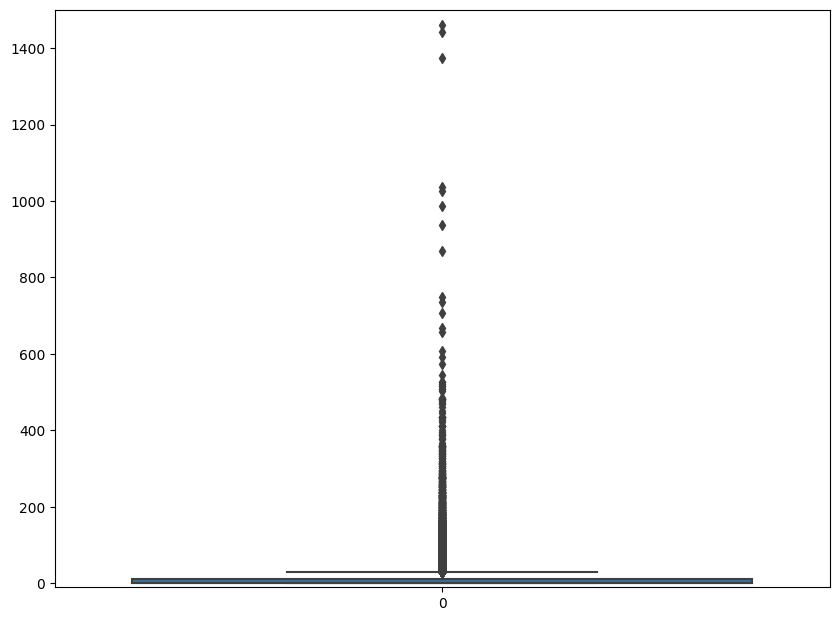

In [48]:
sns.boxplot(users['words_in_user_profile'])
plt.rcParams["figure.figsize"] = [10, 7.50]
plt.ylim(-10,1500)
plt.show()


The average number of words in a user profile is sixteen. There is atleast one user in the platform that 1460 words in his/her profile. 

#### Contacts

In [6]:
contacts.columns

Index(['id_user', 'id_host', 'id_listing', 'ts_interaction_first',
       'ts_reply_at_first', 'ts_accepted_at_first', 'ts_booking_at',
       'ds_checkin_first', 'ds_checkout_first', 'm_guests', 'm_interactions',
       'm_first_message_length_in_characters', 'contact_channel', 'user_type'],
      dtype='object')

In [7]:
inquire = contacts['ts_interaction_first']
inquire_month= pd.DatetimeIndex(inquire).month
inquire = inquire_month.value_counts().sort_index()

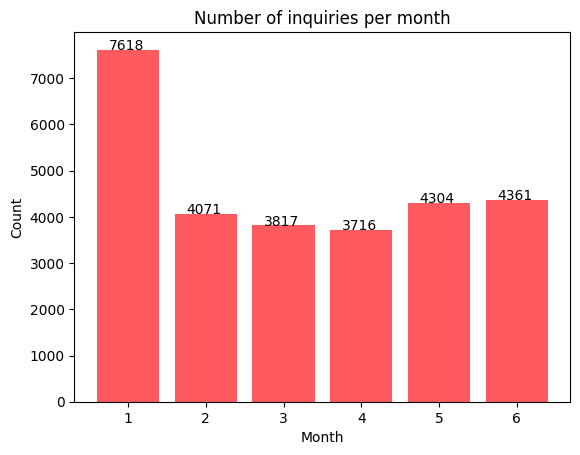

In [8]:
x = inquire.index
y = inquire.values

def label(x,y): 
    for i in range(len(x)):
        plt.text(i+0.75,y[i], y[i])

plt.bar(x,y,color = '#FF5A5F')
label(x,y)
plt.title('Number of inquiries per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

January has the most number of inquiries with 7618. This is followed by June, May, and February. The least number of inquiries is received on April with 3716.

In [9]:
accept = contacts[contacts['ts_accepted_at_first'].notnull()]['ts_accepted_at_first']
accept_month= pd.DatetimeIndex(accept).month
accept = accept_month.value_counts().sort_index()

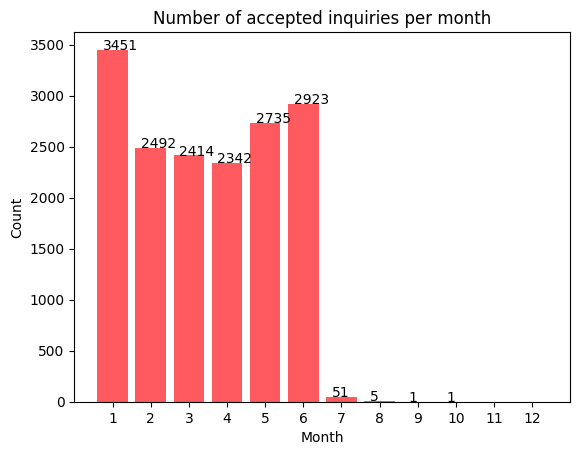

In [11]:
x = accept.index
y = accept.values

def label(x,y): 
    for i in range(len(x)):
        plt.text(i+0.75,y[i], y[i])

plt.bar(x,y,color = '#FF5A5F')
label(x,y)
plt.title('Number of accepted inquiries per month')
plt.xlabel('Month')
plt.xlim(0,13)
plt.xticks(np.arange(1,13))
plt.ylabel('Count')
plt.show()

The month of January has the highest number of accepted inquiries with 3,451 records. This is followed by the month of June with 2,923 inquiries then by May with 2,735 inquiries. The months with the least number of accepted inquiries are September and October with only 1 inquiry respectively. November and December have no accepted inquiry recorded. 

In [12]:
booked = contacts[contacts['ts_booking_at'].notnull()][['ts_booking_at','contact_channel','ds_checkin_first','ds_checkout_first','m_guests']]
booked['ts_booking_at']= pd.DatetimeIndex(booked['ts_booking_at']).month
booked['ts_booking_at'].astype('int32')

0        4
4        6
7        3
8        4
12       2
        ..
27878    5
27879    3
27883    4
27885    2
27886    6
Name: ts_booking_at, Length: 11587, dtype: int32

In [ ]:
booked.groupby(['ts_booking_at']).value_counts()

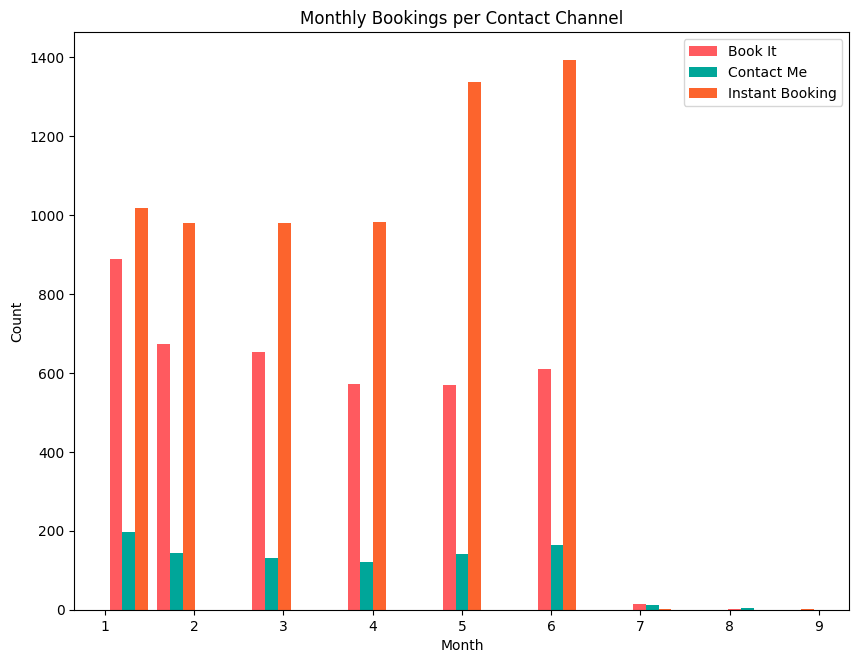

In [168]:
x1= list(booked[booked['contact_channel'] == 'book_it']['ts_booking_at'])
x2 = list(booked[booked['contact_channel'] == 'contact_me']['ts_booking_at'])
x3 = list(booked[booked['contact_channel'] == 'instant_book']['ts_booking_at'])

plt.hist([x1,x2,x3],color = ['#FF5A5F','#00A699','#FC642D'], label = ['Book It', 'Contact Me', 'Instant Booking'],bins =15)
plt.legend()
plt.title('Monthly Bookings per Contact Channel')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

From the chart above, it can be observed that majority of the guests are instantly booking the listings. June is recorded to have the highest number of instant bookings, followed by  May then January. Book it has the second highest number of overall bookings implying that customers have already booked the listing but will still have to wait for the approval of the host. January has the highest number of bookings for this channel. Lastly, only a small number of guests are inquiring first before booking the place. January has the highest number of boookings for this channel, followed by June then May. 

In [14]:
booked['ds_checkin_first'] = pd.DatetimeIndex(booked['ds_checkin_first']).month 
booked['ds_checkout_first'] = pd.DatetimeIndex(booked['ds_checkout_first']).month

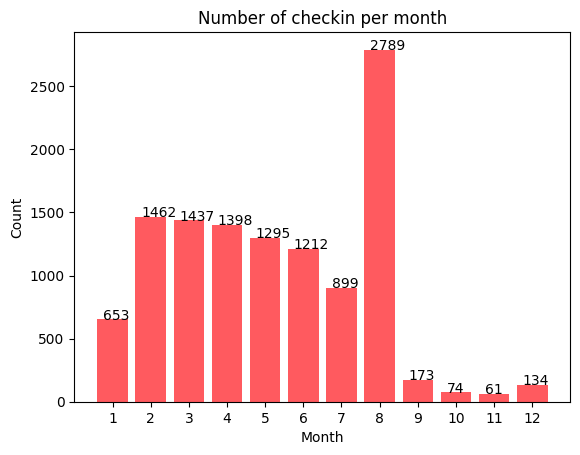

In [15]:
x = booked['ds_checkin_first'].value_counts().sort_index().index
y =booked['ds_checkin_first'].value_counts().sort_index().values

def label(x,y): 
    for i in range(len(x)):
        plt.text(i+0.75,y[i], y[i])

plt.bar(x,y,color = '#FF5A5F')
label(x,y)
plt.title('Number of checkin per month')
plt.xlabel('Month')
plt.xlim(0,13)
plt.xticks(np.arange(1,13))
plt.ylabel('Count')
plt.show()

Listings in Rio de Janeiro are pretty occupied during August. This is highly because of occurence of the Summer Olympics 2016 which was held in Rio. The second busiest month is February then March. November has the least number of checkins with only 61 records.

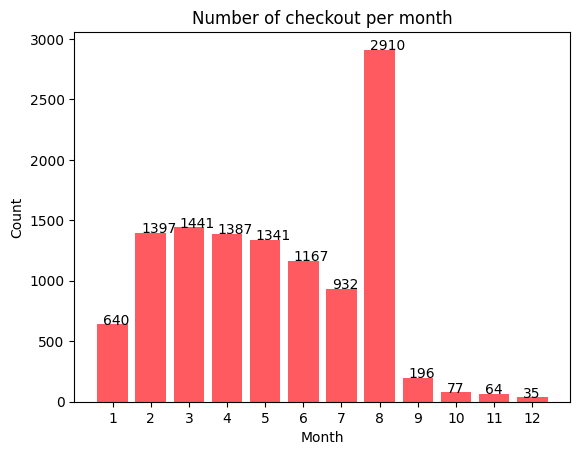

In [16]:
x = booked['ds_checkout_first'].value_counts().sort_index().index
y =booked['ds_checkout_first'].value_counts().sort_index().values

def label(x,y): 
    for i in range(len(x)):
        plt.text(i+0.75,y[i], y[i])

plt.bar(x,y,color = '#FF5A5F')
label(x,y)
plt.title('Number of checkout per month')
plt.xlabel('Month')
plt.xlim(0,13)
plt.xticks(np.arange(1,13))
plt.ylabel('Count')
plt.show()

August has the most number of check out with 2,910 check out dates. This is followed by March then February. December has the least number of checkout dates with only 35 records.  

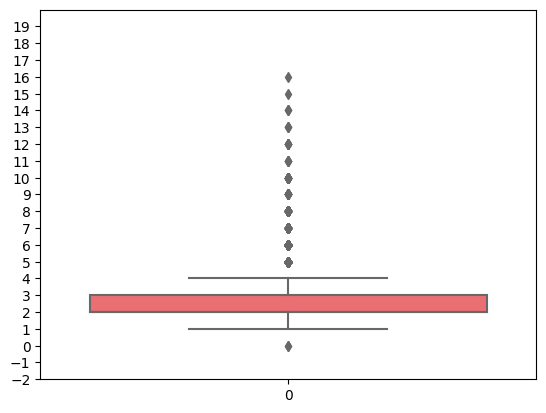

In [17]:
color = ['#FF5A5F']
sns.set_palette(color)
sns.boxplot(booked['m_guests'])
plt.rcParams["figure.figsize"] = [4,5]
plt.ylim(-2,20)
plt.yticks(np.arange(-2,20))
plt.show()


An average of three guests are being accomodated in a booked listing. The most number of people that is included for a booking is 16. 

#### Listings

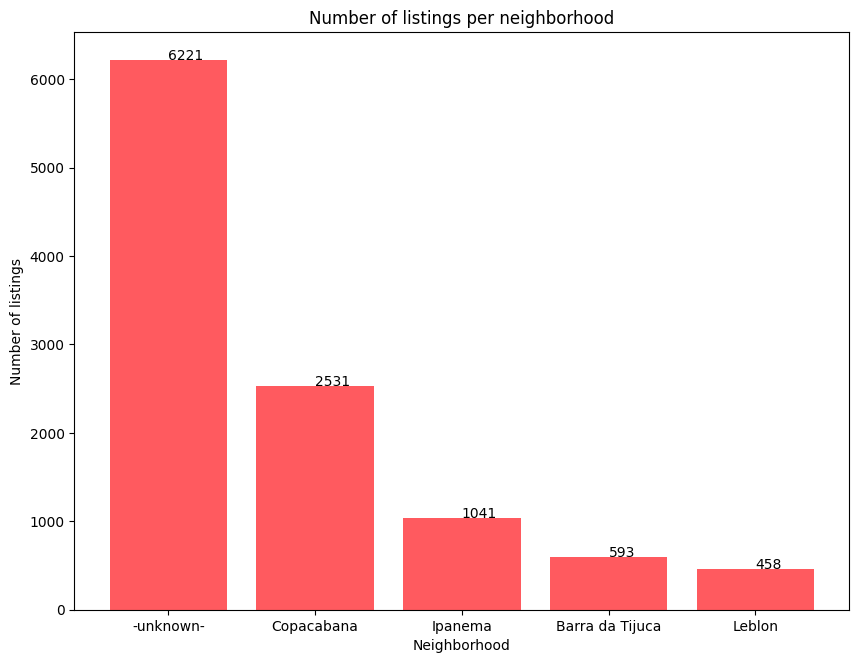

In [99]:
x = listings['listing_neighborhood'].value_counts().iloc[:5].index
y = listings['listing_neighborhood'].value_counts().iloc[:5].values

def label(x,y): 
    for i in range(len(x)):
        plt.text(i,y[i], y[i])

plt.bar(x,y,color = '#FF5A5F')
label(x,y)
plt.title('Number of listings per neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of listings')
plt.show()

In [23]:
listings.shape

(13038, 4)

Almost half of the listings have no indicated locations. Copacabana is a popular place for Airbnb places accounting for 2,531 listings. This is followed by Ipanema with 1041 listings, then Barra da Tijuca with 593 listings, and Leblon with 458 listings. 

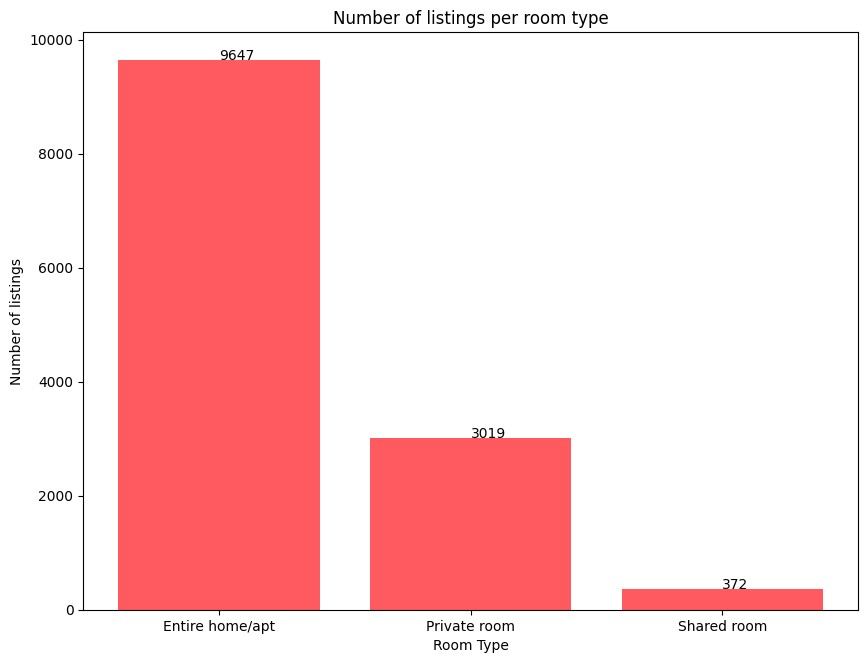

In [201]:
x = listings['room_type'].value_counts().index
y = listings['room_type'].value_counts().values

def label(x,y): 
    for i in range(len(x)):
        plt.text(i,y[i], y[i])

plt.bar(x,y,color = '#FF5A5F')
label(x,y)
plt.title('Number of listings per room type')
plt.xlabel('Room Type')
plt.ylabel('Number of listings')
plt.show()

Most of the listings (74%) are entire homes or apartments with 9,647 records. This is followed by private rooms with 3,019 listings. When guests book a private room, they have their own bedroom but some spaces are shared with other guests. Shared room type listings has the least number of records with only 372. Shared rooms are cheaper since the entire space is shared with other guests.

Room description: https://www.airbnb.com/help/article/5#section-heading-0-0 

In [29]:
listings.describe()

,total_reviews
count,13038.000000
mean,7.004525
std,17.059747
min,-34.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,268.000000


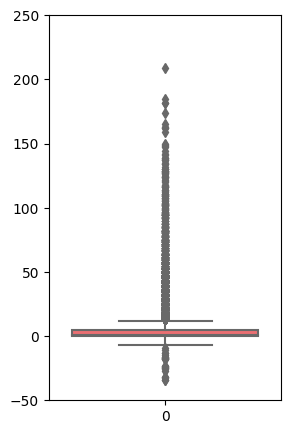

In [68]:
color = ['#FF5A5F']
sns.set_palette(color)
sns.boxplot(listings['total_reviews'])
plt.rcParams["figure.figsize"] = [10, 7.50]
plt.ylim(-50,250)
plt.show()


The average number of reviews per listing is seven reviews. There is atleast one listing in the platform that has 268 reviews. 

# Part 1 : Host Acceptance Decision

The Airbnb platform aims to match guests with a host. However, a successful match
also entails that the host accepts the guest's booking request. Hence, we must consider the two actors in the process and what might contribute to their booking or acceptance decisions.

This project focuses on two things: host acceptance decision and guest booking decision. The project aims to analyze what are the factors that affect host acceptance decision and guest booking decision.

## Import Data: Merge user and contacts dataset 

The first objective of this project is to identify which factors influence the host's acceptance decision. This project assumes that once the host has accepted the guest's inquiry, the host permits the guest to book the listing but it is still up to the guest whether to book the place or not. 


`contacts` and `users` datasets will be used since they have the data for the guest inquiries and guest profile which can have the factors that affect host acceptance decision.     





In [59]:
user_contacts = contacts.merge(users,on ='id_user', how='left')
user_contacts.head()

,id_user,id_host,id_listing,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel,user_type,origin_country,words_in_user_profile
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker,CL,0
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,FR,0
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,AR,0
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40.0,2016-05-05 15:17:40.0,NaN,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new,BR,0
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25.0,2016-06-23 03:09:26.0,2016-06-23 03:09:33.0,2016-06-23 03:09:33.0,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker,BR,1


## Data Preprocessing

In [58]:
user_contacts.isnull().sum()

id_user                      0
id_host                      0
id_listing                   0
first_interaction            0
host_reply                2044
accepted                 11525
ts_booking_at            16371
checkin_date                 0
checkout_date                0
m_guests                     1
m_interactions               0
charLen_of_first_mssg        0
contact_channel              0
user_type                    0
origin_country               1
words_in_user_profile        0
dtype: int64

*  `m_guests` is the number of guests. The dataset only has 1 null entry so we can fill this with 0 as the value. 
* `origin_country` is the country where the user is from. This is a categorical column so imputing methods are not appropriate. Thus, null values will be removed and remaining ones will be encoded. 


#### `m_guests` and `origin_country`

In [60]:
user_contacts['m_guests'] = user_contacts['m_guests'].replace(np.nan,0) #filling null values with 0
user_contacts.dropna(subset = ['origin_country'],inplace = True) #removing null values in origin country

In [125]:
user_contacts.isnull().sum()

id_user                                     0
id_host                                     0
id_listing                                  0
ts_interaction_first                        0
ts_reply_at_first                        2044
ts_accepted_at_first                    11524
ts_booking_at                           16370
ds_checkin_first                            0
ds_checkout_first                           0
m_guests                                    0
m_interactions                              0
m_first_message_length_in_characters        0
contact_channel                             0
user_type                                   0
origin_country                              0
words_in_user_profile                       0
dtype: int64

#### Remove unwanted columns

In [61]:
user_contacts.drop(columns=["ts_booking_at",'id_listing', 'contact_channel'], inplace=True)

contact_channel column will be removed because the 'instant_book' rows are automatically accepted which creates bias in the dataset

#### Label encoding of user_type column

In [62]:
user_contacts['user_type'].value_counts()

user_type
new            15946
past_booker    11997
-unknown-         35
Name: count, dtype: int64

Drop rows with user_type unkown

In [63]:
user_contacts.drop(user_contacts[user_contacts['user_type'] == '-unknown-'].index, inplace = True)

Using label encoder to encode user type column (categorical to numeric)

In [64]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
user_contacts['user_type'] = label_encoder.fit_transform(user_contacts['user_type'])

In [65]:
user_contacts['user_type'].unique()

array([1, 0])

#### Length of Stay 

Change checkin and checkout column to datetime in order to get how long is the stay of a guest

In [66]:
user_contacts['ds_checkin_first'] = pd.to_datetime(user_contacts['ds_checkin_first'],errors='coerce')
user_contacts['ds_checkout_first'] = pd.to_datetime(user_contacts['ds_checkout_first'],errors='coerce')

In [ ]:
user_contacts['length_stay'] = user_contacts['ds_checkout_first'] -  user_contacts['ds_checkin_first']

In [133]:
user_contacts['length_stay (days)']= user_contacts['length_stay'].dt.days

In [134]:
user_contacts.drop(columns=["length_stay"], inplace=True)

In [135]:
user_contacts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27943 entries, 0 to 27978
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id_user                               27943 non-null  object        
 1   id_host                               27943 non-null  object        
 2   ts_interaction_first                  27943 non-null  object        
 3   ts_reply_at_first                     25902 non-null  object        
 4   ts_accepted_at_first                  16436 non-null  object        
 5   ds_checkin_first                      27943 non-null  datetime64[ns]
 6   ds_checkout_first                     27943 non-null  datetime64[ns]
 7   m_guests                              27943 non-null  float64       
 8   m_interactions                        27943 non-null  int64         
 9   m_first_message_length_in_characters  27943 non-null  float64       
 10  use

#### Change data type

To use `ts` and `ds` columns in correlational analysis, they need to be in numerical format or int. Transforming them to int data type means that they are converted into an *epoch timestamp*, the number of seconds elapsed since a certain time period or epoch. In this case, they are converted as timestamp in milliseconds

In [136]:
user_contacts.head(3)

,id_user,id_host,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,user_type,origin_country,words_in_user_profile,length_stay (days)
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,1,CL,0,4
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,2016-08-11,2016-08-22,5.0,2,312.0,1,FR,0,11
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,2016-03-14,2016-03-23,1.0,3,164.0,0,AR,0,9


In [137]:
#from timestamp/datestamp to datetime
user_contacts['ts_accepted_at_first'] = pd.to_datetime(user_contacts['ts_accepted_at_first'],errors='coerce')
user_contacts['ts_reply_at_first'] = pd.to_datetime(user_contacts['ts_reply_at_first'],errors='coerce')
user_contacts['ts_interaction_first'] = pd.to_datetime(user_contacts['ts_interaction_first'],errors='coerce')

In [138]:
#to numeric (number of seconds elapsed since a certain time period)
user_contacts['ts_accepted_at_first'] = pd.to_numeric(user_contacts['ts_accepted_at_first'],errors='coerce')
user_contacts['ts_reply_at_first'] = pd.to_numeric(user_contacts['ts_reply_at_first'],errors='coerce')
user_contacts['ts_interaction_first'] = pd.to_numeric(user_contacts['ts_interaction_first'],errors='coerce')
user_contacts['ds_checkin_first'] = pd.to_numeric(user_contacts['ds_checkin_first'],errors='coerce')
user_contacts['ds_checkout_first'] = pd.to_numeric(user_contacts['ds_checkout_first'],errors='coerce')

#from float to int
import numpy as np
user_contacts['m_guests'] = user_contacts['m_guests'].apply(np.int64)
user_contacts['m_first_message_length_in_characters'] = user_contacts['m_first_message_length_in_characters'].apply(np.int64)

In [139]:
user_contacts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27943 entries, 0 to 27978
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id_user                               27943 non-null  object
 1   id_host                               27943 non-null  object
 2   ts_interaction_first                  27943 non-null  int64 
 3   ts_reply_at_first                     27943 non-null  int64 
 4   ts_accepted_at_first                  27943 non-null  int64 
 5   ds_checkin_first                      27943 non-null  int64 
 6   ds_checkout_first                     27943 non-null  int64 
 7   m_guests                              27943 non-null  int64 
 8   m_interactions                        27943 non-null  int64 
 9   m_first_message_length_in_characters  27943 non-null  int64 
 10  user_type                             27943 non-null  int32 
 11  origin_country                   

#### Encoding of origin_country

In [140]:
user_contacts['origin_country'].unique()

array(['CL', 'FR', 'AR', 'BR', 'AT', 'NL', 'US', 'ME', 'GB', 'RU', 'UY',
       'CH', 'BE', 'AU', 'NO', 'PT', 'CN', 'GR', 'DE', 'ES', 'EE', 'PY',
       'CA', 'CZ', 'HU', 'CO', 'LT', 'IT', 'PE', 'BO', 'TW', 'OM', 'SE',
       'JM', 'NZ', 'MX', 'UA', 'CR', 'TT', 'DK', 'FI', 'IL', 'ZA', 'AE',
       'MY', 'VE', 'SG', 'SA', 'IE', 'LV', 'IN', 'KR', 'HN', 'LU', 'TR',
       'JP', 'BY', 'MT', 'RS', 'PL', 'GF', 'MC', 'GT', 'QA', 'SI', 'PH',
       'PA', 'CY', 'NP', 'EC', 'PR', 'IS', 'MA', 'GE', 'BG', 'TH', 'EG',
       'VI', 'LK', 'RO', 'HK', 'KE', 'BA', 'BS', 'AO', 'SK', 'JE', 'RE',
       'KW', 'DO', 'SR', 'BM', 'PK', 'MK', 'LB', 'BZ', 'SM', 'BB', 'HR',
       'MZ', 'LY', 'NG', 'KY', 'GH', 'IQ', 'UG', 'JO', 'MU', 'GU', 'ID',
       'BD', 'AW', 'PF', 'NC', 'GP', 'VN', 'AZ', 'SV', 'MN', 'FJ', 'CD'],
      dtype=object)

In [141]:
pip install category-encoders

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


M-Estimate Encoder is a simplified version of Target Encoder, a common techqniue for categorical encoding. It has a smoothing factor as a hyperparameter which gives emphasis per value group in the categorical column, addressing overfitting. 

See here: https://www.kaggle.com/code/ryanholbrook/target-encoding 

In [ ]:
%%time
from category_encoders.m_estimate import MEstimateEncoder
ME_encoder = MEstimateEncoder()

ME_encoder.fit(user_contacts['origin_country'], user_contacts['ts_accepted_at_first'])
user_contacts['origin_country'] = ME_encoder.transform(user_contacts['origin_country'])

## Correlation (Acceptance Decision)

### What affects host acceptance decision?


In [57]:
user_contacts.rename(columns = {'ts_accepted_at_first': 'accepted',
                                   'ts_interaction_first':'first_interaction',
                                'ts_reply_at_first': 'host_reply',
                           'ds_checkin_first':'checkin_date',
                           'ds_checkout_first':'checkout_date',
                'm_first_message_length_in_characters': 'charLen_of_first_mssg'},inplace= True)

In [29]:
user_contacts.describe()

,first_interaction,host_reply,accepted,checkin_date,checkout_date,m_guests,m_interactions,charLen_of_first_mssg,user_type,origin_country,words_in_user_profile,length_stay (days)
count,2.794300e+04,2.794300e+04,2.794300e+04,2.794300e+04,2.794300e+04,27943.000000,27943.000000,27943.000000,27943.000000,2.794300e+04,27943.000000,27943.000000
mean,-1.101362e+18,6.786245e+17,-2.939822e+18,1.464714e+18,1.465367e+18,2.782271,8.247289,193.792148,0.429338,-1.584627e+15,10.193644,7.556383
std,4.559639e+18,2.779624e+18,5.257702e+18,7.642909e+15,7.791692e+15,1.866408,10.023480,183.175297,0.494991,1.176801e+17,30.840772,14.313005
min,-9.223372e+18,-9.223372e+18,-9.223372e+18,1.451606e+18,1.451693e+18,0.000000,1.000000,0.000000,0.000000,-4.611759e+18,0.000000,1.000000
25%,1.451836e+18,1.453470e+18,-9.223372e+18,1.457654e+18,1.458259e+18,2.000000,3.000000,66.000000,0.000000,-2.282264e+14,0.000000,3.000000
50%,1.454685e+18,1.457826e+18,1.453479e+18,1.465603e+18,1.466381e+18,2.000000,5.000000,154.000000,0.000000,-2.282264e+14,0.000000,4.000000
75%,1.461077e+18,1.462929e+18,1.460602e+18,1.470614e+18,1.471306e+18,4.000000,10.000000,269.000000,1.000000,2.039942e+13,1.000000,8.000000
max,1.467331e+18,1.487840e+18,1.479813e+18,1.525133e+18,1.525392e+18,16.000000,410.000000,2341.000000,1.000000,1.216364e+18,658.000000,365.000000


<Axes: >

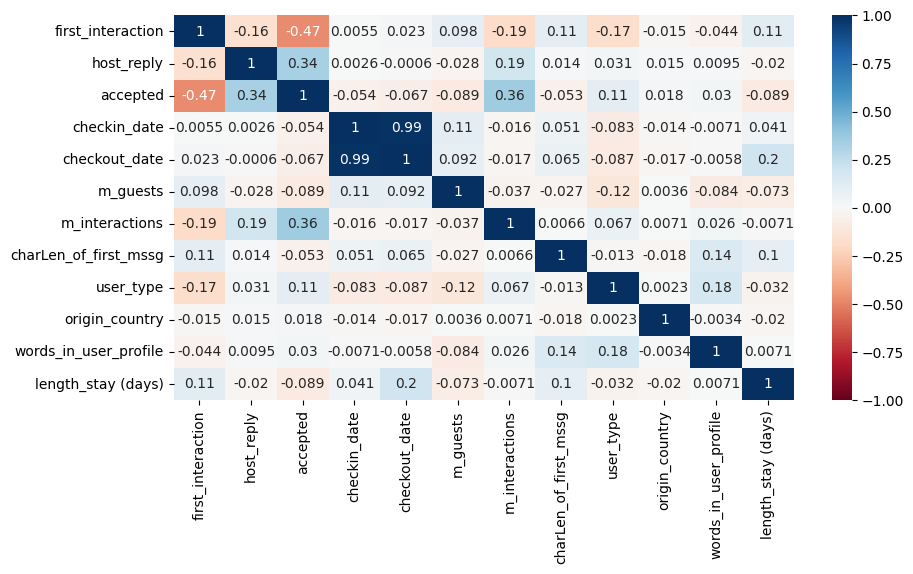

In [30]:
features = user_contacts.iloc[:,2:]
corr = features.corr()
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, cmap= 'RdBu', vmin = -1, vmax= 1, annot = True)

Among the factors examined, the number of interactions has the highest correlational value with r = 0.36. This implies that the number of interactions is the most influential to the guest's booking decision.

# Part 2 : Booking Decision

## Importing Data

In [103]:
listing_contacts = contacts.merge(listings,on ='id_listing', how='left')
listing_contacts.head(3)

,id_user,id_host,id_listing,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel,user_type,room_type,listing_neighborhood,total_reviews
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0


Remove unwanted columns

In [104]:
listing_contacts.drop(columns=["id_host", 'ds_checkin_first', 'ds_checkout_first','m_guests',
                               'm_first_message_length_in_characters','contact_channel', 'user_type'], inplace=True)

In [ ]:
listing_contacts.head()

## Data Preprocessing

#### Encode room type 

In [105]:
listing_contacts['room_type'].value_counts()

room_type
Entire home/apt    20981
Private room        6314
Shared room          592
Name: count, dtype: int64

In [108]:
label_encoder = preprocessing.LabelEncoder()
listing_contacts['room_type'] = label_encoder.fit_transform(listing_contacts['room_type'])

In [109]:
listing_contacts['room_type'].value_counts()

room_type
0    20981
1     6314
2      592
Name: count, dtype: int64

#### Waiting time for host's reply

Changing data type of interaction and reply to datetime in order to get the difference in the guest's first inquiry and the host's reply                          

In [110]:
listing_contacts['ts_interaction_first'] = pd.to_datetime(listing_contacts['ts_interaction_first'],errors='coerce')
listing_contacts['ts_reply_at_first'] = pd.to_datetime(listing_contacts['ts_reply_at_first'],errors='coerce')

Create new column that contains time passed between host's reply and the moment the inquiry was made

In [111]:
listing_contacts['duration'] = listing_contacts['ts_reply_at_first'] - listing_contacts['ts_interaction_first'] 

Convert duration into hours

In [113]:
listing_contacts['hours'] = listing_contacts['duration']/pd.Timedelta(hours=1)

#### Change data type

In [42]:
#timestamp to datetime
listing_contacts['ts_accepted_at_first'] = pd.to_datetime(listing_contacts['ts_accepted_at_first'],errors='coerce')
listing_contacts['ts_booking_at'] = pd.to_datetime(listing_contacts['ts_booking_at'],errors='coerce')

In [43]:
#to numeric (number of seconds elapsed since a certain time period)
listing_contacts['ts_interaction_first'] = pd.to_numeric(listing_contacts['ts_interaction_first'],errors='coerce')
listing_contacts['ts_reply_at_first'] = pd.to_numeric(listing_contacts['ts_reply_at_first'],errors='coerce')
listing_contacts['ts_accepted_at_first'] = pd.to_numeric(listing_contacts['ts_accepted_at_first'],errors='coerce')
listing_contacts['ts_booking_at'] = pd.to_numeric(listing_contacts['ts_booking_at'],errors='coerce')

#from float to int

listing_contacts['total_reviews'] = listing_contacts['total_reviews'].apply(np.int64)

In [44]:
listing_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27887 entries, 0 to 27886
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   id_user               27887 non-null  object         
 1   id_listing            27887 non-null  object         
 2   ts_interaction_first  27887 non-null  int64          
 3   ts_reply_at_first     27887 non-null  int64          
 4   ts_accepted_at_first  27887 non-null  int64          
 5   ts_booking_at         27887 non-null  int64          
 6   m_interactions        27887 non-null  int64          
 7   room_type             27887 non-null  int32          
 8   listing_neighborhood  27887 non-null  object         
 9   total_reviews         27887 non-null  int64          
 10  duration              19162 non-null  timedelta64[ns]
 11  hours                 19162 non-null  float64        
dtypes: float64(1), int32(1), int64(6), object(3), timedelta64[ns

In [45]:
listing_contacts.drop(columns=["duration"], inplace=True)

#### Encode listing neighborhood

There are a lot of unknown entries in the listing neighborhood column

In [46]:
listing_contacts['listing_neighborhood'].value_counts()

listing_neighborhood
-unknown-          11828
Copacabana          6527
Ipanema             2994
Leblon              1021
Barra da Tijuca      998
                   ...  
Vigário Geral          1
Vaz Lobo               1
Coelho Neto            1
Rocinha                1
Madureira              1
Name: count, Length: 68, dtype: int64

Out of the 11828 listings with 'unknown' as their neighborhood, 4306 were booked. 

In [48]:
num = len(listing_contacts[(listing_contacts['listing_neighborhood']=='-unknown-') &
                 (listing_contacts['ts_booking_at'] > 1)][['listing_neighborhood','ts_booking_at']])
print(f'Booked with unknown neighborhood: {num}')

Booked with unknown neighborhood: 4306


This project will consider the '-unknown-' values as another value since they make up a significant portion of the whole dataset. M-Estimate encoding will be applied to the listing_neighborhood column since the unique nominal values are greater than 3. 

In [49]:
%%time
from category_encoders.m_estimate import MEstimateEncoder
ME_encoder = MEstimateEncoder()

ME_encoder.fit(listing_contacts['listing_neighborhood'], listing_contacts['ts_booking_at'])
listing_contacts['listing_neighborhood'] = ME_encoder.transform(listing_contacts['listing_neighborhood'])

CPU times: total: 62.5 ms
Wall time: 82.3 ms


In [50]:
listing_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27887 entries, 0 to 27886
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_user               27887 non-null  object 
 1   id_listing            27887 non-null  object 
 2   ts_interaction_first  27887 non-null  int64  
 3   ts_reply_at_first     27887 non-null  int64  
 4   ts_accepted_at_first  27887 non-null  int64  
 5   ts_booking_at         27887 non-null  int64  
 6   m_interactions        27887 non-null  int64  
 7   room_type             27887 non-null  int32  
 8   listing_neighborhood  27887 non-null  float64
 9   total_reviews         27887 non-null  int64  
 10  hours                 19162 non-null  float64
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 2.2+ MB


## Correlation (Booking Decision)

In [52]:
listing_contacts.rename(columns = {'ts_interaction_first':'guest_inquiry',
                           'ts_reply_at_first':'host_reply',
                           'ts_accepted_at_first':'accepted', 'hours':'waitTime_reponse'},inplace= True)

<Axes: >

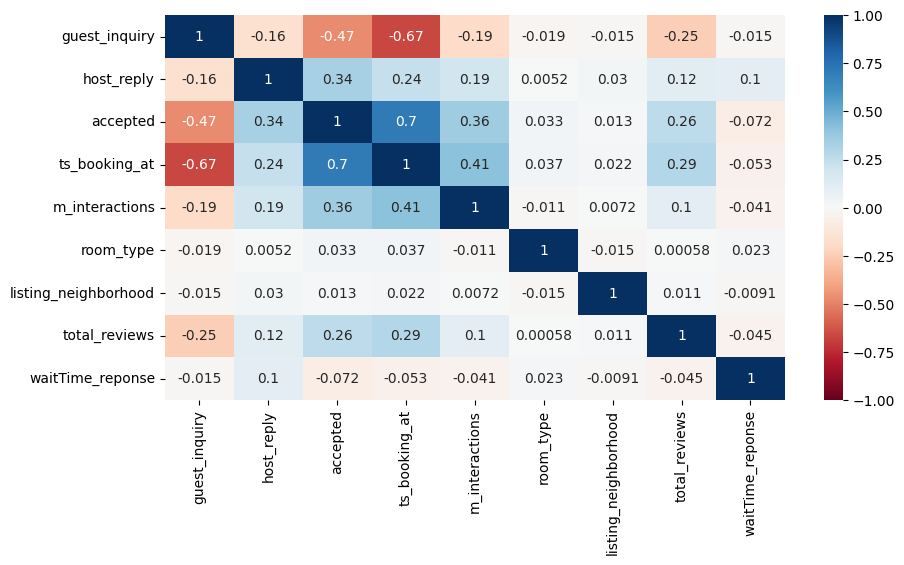

In [53]:
features = listing_contacts.iloc[:,2:]
corr = features.corr()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr, cmap= 'RdBu', vmin = -1, vmax= 1, annot = True)


Among the factors examined, the time when the host accepted the guest's inquiry has the highest correlational value with r = 0.7. This implies that the host's acceptance decision is the most influential to the guest's booking decision. This is followed by the number of interactions between the guest and host then by the total reviews of the listing. 

#### Key Metrics

The key metrics are based from the features highly associated with the host's acceptance decision and guest's booking decision.

1. Number of interactions 
2. Inquiry to booking conversion 
3. Repeat bookings 
4. Response rate 
5. Review rate 

# How do we increase bookings in Rio

### Booking Conversion

Booking conversion measures the percentage of inquiries that turns into bookings. This is computed by (# of people who booked / # of people who inquired) * 100 

In [93]:
contacts.isnull().sum()

id_user                                     0
id_host                                     0
id_listing                                  0
ts_interaction_first                        0
ts_reply_at_first                        2032
ts_accepted_at_first                    11472
ts_booking_at                           16300
ds_checkin_first                            0
ds_checkout_first                           0
m_guests                                    1
m_interactions                              0
m_first_message_length_in_characters        0
contact_channel                             0
user_type                                   0
dtype: int64

From the table above, it can be observed that there are more null values for the booking column than the accepted/inquiry column. This implies that there are less bookings than inquiries. 

Get rows that only have values in either accepted or booking column. Rows that have null values in both columns will not be retrieved.

In [19]:
conversion=contacts[contacts['ts_accepted_at_first'].notnull() | contacts['ts_booking_at'].notnull()][['ts_accepted_at_first','ts_booking_at','m_interactions','contact_channel']]
conversion = pd.DataFrame(conversion)

Get the month of the datetime record to be used for visualization.

In [20]:
conversion['ts_accepted_at_first'] = pd.DatetimeIndex(conversion['ts_accepted_at_first']).month
conversion['ts_booking_at'] = pd.DatetimeIndex(conversion['ts_booking_at']).month

Get number of accepted inquiries for each month and place them in dataframe following the correct order of the months (from 1- 12) 

In [21]:
inq = conversion['ts_accepted_at_first'].value_counts().sort_index()
inq = pd.DataFrame(inq)
inq.columns = ['inq']

In [22]:
inq

,inq
ts_accepted_at_first,
1,3451
2,2492
3,2414
4,2342
5,2735
6,2923
7,51
8,5
9,1


Since `ts_accepted_at_first` column has more non-null values, it will be used as the basis for counting the respective bookings for that month. The column for inquiries is done first and the bookings column will be filled by counting the bookings using the index column of `inq` then the values will be appended to the respective row.  

In [23]:
index = []
book = []
i = 0
for i in range (len(inq.index)): 
    value = conversion[conversion['ts_accepted_at_first'] == inq.index[i]]['ts_booking_at'].count()
    index.append(inq.index[i])
    book.append(value)

#convert list to pandas series  
book = pd.Series(book, index = index)

Concatenate the series to the inquiry column so that the count for monthly bookings will be appended to the respective row. 

In [24]:
inq_book = pd.concat([inq,book],axis = 1)
pd.DataFrame(inq_book)
inq_book.columns= ['inq','book']
print(inq_book)

     inq  book
1   3451  2114
2   2492  1797
3   2414  1762
4   2342  1677
5   2735  2049
6   2923  2166
7     51    19
8      5     2
9      1     1
11     1     0


Calculate the conversion rate by dividing the bookings to the inquiries and get the percentage

In [25]:
inq_book.index.name = 'Month'
inq_book['conversion_rate_%'] = (inq_book['book'] / inq_book['inq']) * 100
inq_book

,inq,book,conversion_rate_%
Month,,,
1,3451,2114,61.257606
2,2492,1797,72.110754
3,2414,1762,72.990886
4,2342,1677,71.605465
5,2735,2049,74.917733
6,2923,2166,74.101950
7,51,19,37.254902
8,5,2,40.000000
9,1,1,100.000000


Plot the values using a line graph

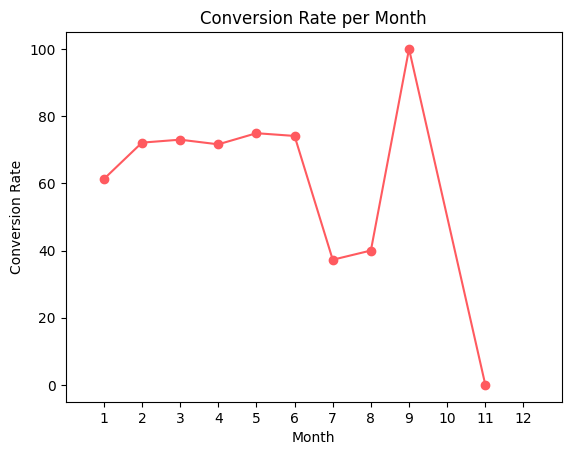

In [31]:
inq_book['conversion_rate_%'].plot(marker= 'o',color = '#FF5A5F')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate per Month')
plt.xlim(0,13)
plt.xticks(np.arange(1,13))
plt.show()

The conversion rate ranges from 60% to 80% from January to May with May having the highest conversion rate of 74.92%. Decline in conversion rate starts from June but it becomes apparent in July with an almost 38% decrease from May. November has the highest conversion rate but it can also be observed that there is only 1 inquiry and 1 booking for this month. December is the quietest month for the whole year for Airbnb hosts as there are no inquiries and bookings recorded for the month. Most of the months have conversion rates above 50%, which indicates that the strategy is effective in converting guests to occupants. 



### Number of Interactions 

Number of interactions for successful bookings. Have groups per value, plot the frequency for each value group to identify the bracket of the most common number of messages in a conversation. 

In [26]:
conversion[conversion['ts_booking_at'].notnull()]['m_interactions']

0        30
4        25
7         8
8         6
12        2
         ..
27878     3
27879    15
27883    21
27885    20
27886    12
Name: m_interactions, Length: 11587, dtype: int64

In [27]:
conversion['m_interactions'].describe()

count    16415.000000
mean        11.260920
std         11.663856
min          1.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        410.000000
Name: m_interactions, dtype: float64

For the booked transactions, conversations can be as long as 410 messages as as short as 1 message. The minimum and maximum values will be the basis for the limit of x-values in our graph 

Making 'bins' or range of values for the number of interactions

In [28]:
conversion['bins'] = pd.cut(conversion['m_interactions'], bins = [0,40,80,120,160,200,240,280,320,360,400,440])

In [29]:
conversion['bins'] = conversion['bins'].astype('string')

Replacing '( ]' in the bins so that it will just be numerical

In [30]:
conversion['bins'] = conversion['bins'].str.replace("," , " to")
conversion['bins'] = conversion['bins'].str.replace("(" , "")
conversion['bins'] = conversion['bins'].str.replace("]" , "")

The final result:

In [43]:
conversion['bins']

0        0 to 40
3        0 to 40
4        0 to 40
6        0 to 40
7        0 to 40
          ...   
27880    0 to 40
27883    0 to 40
27884    0 to 40
27885    0 to 40
27886    0 to 40
Name: bins, Length: 16415, dtype: string

Plotting the number of interactions for each value range

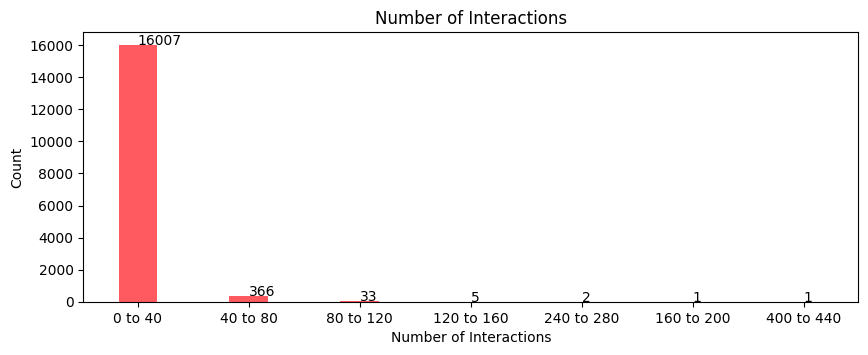

In [32]:
x = conversion['bins'].value_counts().index
y = conversion['bins'].value_counts().values
width = 0.35

def label(x,y): 
    for i in range(len(x)):
        plt.text(i,y[i], y[i])

plt.bar(x,y,width,color = '#FF5A5F')
label(x,y)

plt.title('Number of Interactions')
plt.ylabel("Count")
plt.xlabel("Number of Interactions")
plt.rcParams["figure.figsize"] = [10, 8]
plt.show()

Making 'bins' for the range 0 to 40

In [131]:
conversion['bins < 40'] = pd.cut(conversion[conversion['m_interactions'] < 40]['m_interactions'], bins = [0,5,15,25,40])

In [140]:
conversion['bins < 40']  = conversion['bins < 40'] .astype('string')
conversion['bins < 40'] = conversion['bins < 40'] .str.replace("," , " to")
conversion['bins < 40']  = conversion['bins < 40'] .str.replace("(" , "")
conversion['bins < 40']  = conversion['bins < 40'] .str.replace("]" , "")

In [143]:
conversion['bins < 40'].value_counts()

bins < 40
5.0 to 15.0     7213
0.0 to 5.0      5637
15.0 to 25.0    2263
25.0 to 40.0     863
Name: count, dtype: Int64

Manipulating the table above so that the indices follow the proper order of range values

In [149]:
index_dict = {'0 to 5': 5637,'5 to 15': 7213,'15 to 25': 2263, '25 to 40':863}
interaction =pd.Series(index_dict)

In [147]:
interaction

0.0 to 5.0      5637
5.0 to 15.0     7213
15.0 to 25.0    2263
25.0 to 40.0     863
dtype: int64

In [156]:
interaction.index

Index(['0 to 5', '5 to 15', '15 to 25', '25 to 40'], dtype='object')

Plotting the number of interactions for each value range (under 40 interactions)

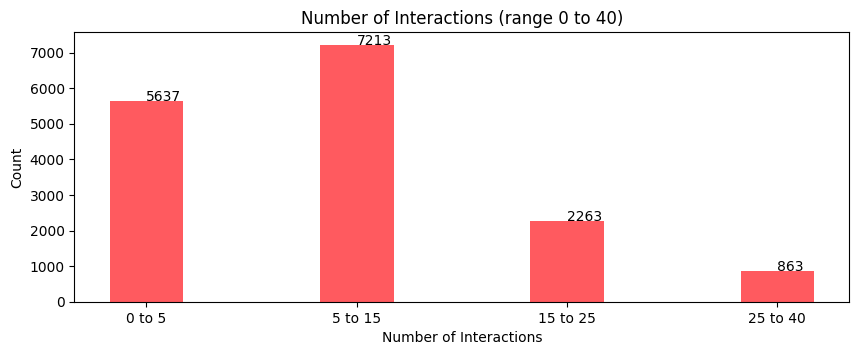

In [163]:
x = interaction.index
y = interaction.values
width = 0.35

def label(x,y): 
    for i in range(len(x)):
        plt.text(i,y[i], y[i])

plt.bar(x,y,width,color = '#FF5A5F')
label(x,y)
        
#ax.set_xticklabels([i.replace("," , " to") for i in interval])
plt.title('Number of Interactions (range 0 to 40)')
plt.ylabel("Count")
plt.xlabel("Number of Interactions")
plt.rcParams["figure.figsize"] = [10, 3.50]
plt.show()



Almost all conversations between the host and guest are within the range of zero to forty messages. Eighty percent of messages are within zero to sixteen in length and around 15% are between 16 and 32 in length. The results are an indication that guests are satisfied with the host's reply even in such short engagement because conversations are less than the maximum allowed messages sent per day which is 25.  


### Repeat Bookings

In [34]:
repeat_book = contacts[contacts['ts_booking_at'].notnull()][['ts_booking_at','user_type','id_user']] #get the booking date, user type, and user ID for all bookings
repeat_book['ts_booking_at'] = pd.DatetimeIndex(repeat_book['ts_booking_at']).month #extract the month of the booking date

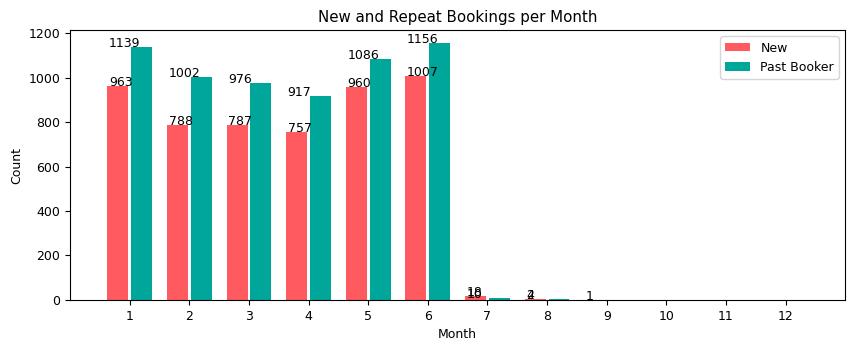

<Figure size 1000x350 with 0 Axes>

In [8]:
#Get the number of bookings for each month for new users  
x1 = repeat_book[repeat_book['user_type'] == 'new']['ts_booking_at'].value_counts().sort_index().index #index is the month
y1 = repeat_book[repeat_book['user_type'] == 'new']['ts_booking_at'].value_counts().sort_index().values # values is the number of bookings

#Get the number of bookings for each month for past bookers 
x2 = repeat_book[repeat_book['user_type'] == 'past_booker']['ts_booking_at'].value_counts().sort_index().index 
y2 = repeat_book[repeat_book['user_type'] == 'past_booker']['ts_booking_at'].value_counts().sort_index().values
width = 0.35

def label(x,y): 
    for i in range(len(x)):
        plt.text(i+0.65,y[i], y[i])

plt.bar(x1 -0.20,y1,width,color = '#FF5A5F')
label(x1,y1)
plt.bar(x2+0.20,y2,width,color = '#00A699')
label(x2,y2)
plt.title('New and Repeat Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(['New', 'Past Booker'])
plt.xlim(0,13)
plt.xticks(np.arange(1,13))
plt.rcParams["figure.figsize"] = [10, 3.50]
plt.rcParams.update({'font.size': 9})
fig = plt.figure()
fig.subplots_adjust(bottom=0.500)
plt.show()


The graph above demonstrates the number of new and repeat bookings per month. It can be observed that there are more repeat guests in the platform than new guests. June has the highest number of booked listings where 53.4% of those are reserved by past bookers. January has the second highest number of bookings, 54% are booked by past bookers. On the contrary, monthly take up by new bookers is not too far behind repeat bookers. New bookers for June account for 47% of the total bookings, which is only a 0.6% difference from the number of past bookers for the month. Moreover, the bookings for January consists of 46% new bookers and bookings for May consists of 47% new bookers. The numbers show that there are a lot of loyal customers in the platform further exhibiting high customer satisfaction with the service. The high number of new bookers also signify that people are willing to try new things by booking listings that they never booked before.  

Getting the user's origin country for those who have successfully booked 

In [7]:
country_book = repeat_book.merge(users,on ='id_user', how='left')
country_book.head()

,ts_booking_at,user_type,id_user,origin_country,words_in_user_profile
0,4,past_booker,da8656a1-51af-4f38-b1c4-94be1f585157,CL,0
1,6,past_booker,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,BR,1
2,3,new,b3357bab-cf20-4646-b723-23ae84fc8fb3,AT,185
3,4,past_booker,e52ccc38-1ca1-48b4-a10a-08663601dbbb,NL,1
4,2,past_booker,a2c8d522-41df-4b49-9aaf-6c4b3d95afed,US,45


Plotting the count of bookers for the top 5 countries with most bookers

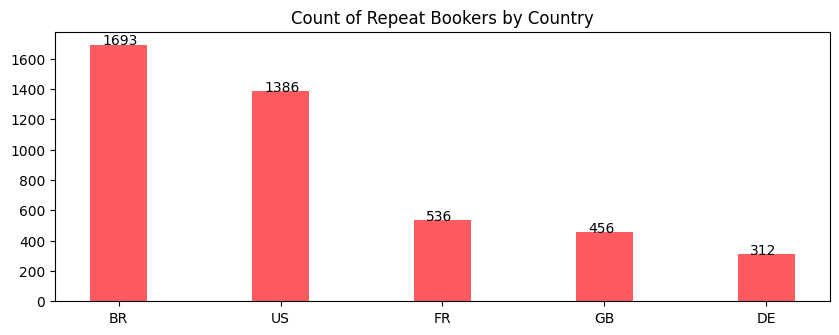

<Figure size 1000x350 with 0 Axes>

In [14]:
past = country_book[country_book['user_type'] == 'past_booker']['origin_country'].value_counts().iloc[:5].index
past2 = country_book[country_book['user_type'] == 'past_booker']['origin_country'].value_counts().iloc[:5].values
width = 0.35


def label(x,y): 
    for i in range(len(x)):
        plt.text(i-0.1,y[i], y[i])

plt.bar(past,past2,width,color = '#FF5A5F')
label(past,past2)
plt.title('Count of Repeat Bookers by Country')
plt.rcParams["figure.figsize"] = [10, 3.50]
fig = plt.figure()
fig.subplots_adjust(bottom=0.500)

In [12]:
new = country_book[country_book['user_type'] == 'new']['origin_country'].value_counts().iloc[:5].index
new2 = country_book[country_book['user_type'] == 'new']['origin_country'].value_counts().iloc[:5].values

Plotting the count of new bookers for the top 5 countries with most bookers

Text(0.5, 1.0, 'Count of New Bookers by Country')

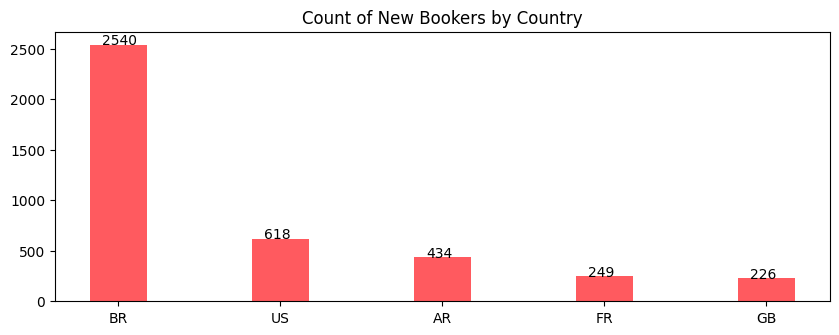

In [13]:

plt.bar(new,new2,width,color = '#FF5A5F')
label(new,new2)
plt.title('Count of New Bookers by Country')

Repeat bookers are usually from the parent country, Brazil, accounting for 1693 bookers. This is followed by the US with 1386 new bookers, then France with 536 bookers, Great Britain with 456 bookers, and Denmark with 312 bookers. On the other hand, new bookers are still usually from Brazil, accounting for 2540 bookers. This is followed by the US with 618 new bookers, then their neighbor Argentina with 434 bookers, France with 249 bookers, and Great Britain with 226 bookers. 

### Response Rate

Divide the total time it takes to respond to all your inquiries by the total number of inquiries you received. 

In [69]:
contacts.isnull().sum()

id_user                                     0
id_host                                     0
id_listing                                  0
ts_interaction_first                        0
ts_reply_at_first                        2032
ts_accepted_at_first                    11472
ts_booking_at                           16300
ds_checkin_first                            0
ds_checkout_first                           0
m_guests                                    1
m_interactions                              0
m_first_message_length_in_characters        0
contact_channel                             0
user_type                                   0
dtype: int64

In [39]:
response =  contacts[['ts_reply_at_first','ts_interaction_first']]
response = pd.DataFrame(response)

In [118]:
response.isnull().sum()

ts_reply_at_first       2032
ts_interaction_first       0
dtype: int64

Get the waiting time of guest for the host's reply (datetime of first inquiry - datetime of reply)

In [40]:
response['ts_reply_at_first'] = pd.DatetimeIndex(response['ts_reply_at_first'])
response['ts_interaction_first'] = pd.DatetimeIndex(response['ts_interaction_first'])

In [41]:
response['duration'] = response['ts_reply_at_first'] - response['ts_interaction_first'] 

Making value ranges to visualize at what duration do guests usually wait 

In [8]:
bins = [
    pd.Timedelta(seconds = 0),
    pd.Timedelta(minutes = 5),
    pd.Timedelta(minutes = 15),
    pd.Timedelta(minutes = 30),
    pd.Timedelta(minutes = 45),
    pd.Timedelta(hours = 1),
    pd.Timedelta(days = 410)]

labels = ['0-5min','5-15min', '15-30min', '30-45min', '45min - 1hr', '1hr+']

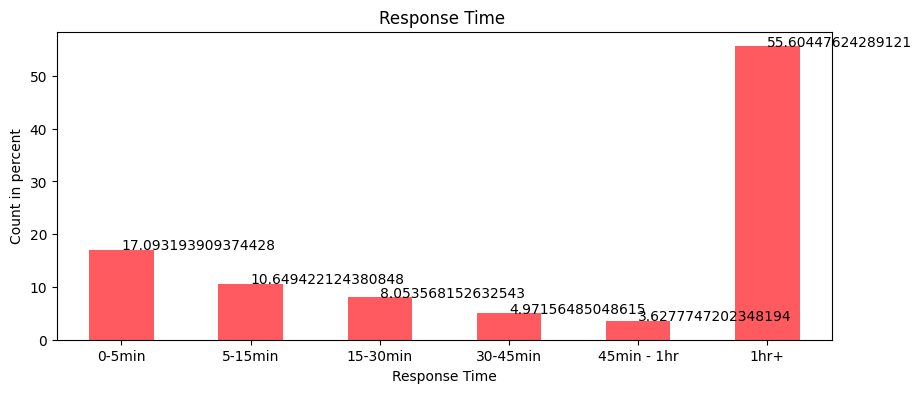

In [327]:
response['bins'] = pd.cut(response['duration'], bins, labels = labels)
interval_percent = response['bins'].value_counts(sort= False, normalize = True).mul(100)
interval_percent.plot.bar(rot = 0, color = '#FF5A5F',figsize = (10,4))
x = interval_percent.index
y = interval_percent.values

def label(x,y): 
    for i in range(len(x)):
        plt.text(i,y[i], y[i])

plt.title('Response Time ')
label(x,y)
plt.ylabel('Count in percent')
plt.xlabel('Response Time')
plt.show()


In [323]:
response['bins'].value_counts(dropna=False)

bins
1hr+           12124
NaN             6083
0-5min          3727
5-15min         2322
15-30min        1756
30-45min        1084
45min - 1hr      791
Name: count, dtype: int64

A majority of the guests wait for the host's response for more than an hour.   

Extracting the month

In [42]:
response['ts_reply_at_first'] = pd.DatetimeIndex(response['ts_reply_at_first']).month
response['ts_interaction_first'] = pd.DatetimeIndex(response['ts_interaction_first']).month

Sorting the index which is the month in order to follow the correct order of the months

In [43]:
reply = response['ts_reply_at_first'].value_counts().sort_index()
reply = pd.DataFrame(reply)
reply.columns = ['reply']

Get the total duration for each month

In [44]:
duration_sum = response.groupby(['ts_reply_at_first'])['duration'].sum()
duration_sum = pd.DataFrame(duration_sum)

In [45]:
response_rate = pd.concat([duration_sum,reply],axis = 1)
pd.DataFrame(response_rate)
response_rate.columns= ['duration','# of inquiries']
print(response_rate)

                            duration  # of inquiries
ts_reply_at_first                                   
1.0               2655 days 02:16:22            6721
2.0               2126 days 08:29:50            3797
3.0               1425 days 11:46:35            3553
4.0               1862 days 18:07:01            3518
5.0               1887 days 13:12:24            4034
6.0               2545 days 16:54:14            4161
7.0               1756 days 08:50:10              60
8.0                515 days 04:07:41               4
9.0                639 days 20:28:40               4
10.0               323 days 06:39:03               2
11.0               166 days 12:26:23               1


Calculate the reponse rate and put the values to a new column called response rate 

In [46]:
response_rate.index.name = 'Month'
response_rate['response_rate'] = (response_rate['duration'] / response_rate['# of inquiries']) 
response_rate

,duration,# of inquiries,response_rate
Month,,,
1.0,2655 days 02:16:22,6721,0 days 09:28:51.852700490
2.0,2126 days 08:29:50,3797,0 days 13:26:24.774822228
3.0,1425 days 11:46:35,3553,0 days 09:37:44.338587109
4.0,1862 days 18:07:01,3518,0 days 12:42:28.158328595
5.0,1887 days 13:12:24,4034,0 days 11:13:47.452652454
6.0,2545 days 16:54:14,4161,0 days 14:40:59.614035087
7.0,1756 days 08:50:10,60,29 days 06:32:50.166666666
8.0,515 days 04:07:41,4,128 days 19:01:55.250000
9.0,639 days 20:28:40,4,159 days 23:07:10


Plotting response rate per month (in nanoseconds)

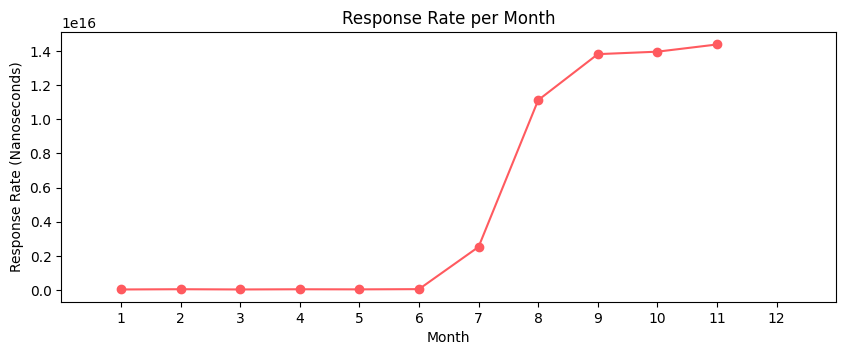

In [50]:
response_rate['response_rate'].plot(marker= 'o',color = '#FF5A5F')
plt.ylabel('Response Rate (Nanoseconds)')
plt.title('Response Rate per Month')
plt.xlim(0,13)
plt.xticks(np.arange(1,13))
plt.show()

In [30]:
response_rate['response_rate'] 

Month
1.0     0 days 09:28:51.852700490
2.0     0 days 13:26:24.774822228
3.0     0 days 09:37:44.338587109
4.0     0 days 12:42:28.158328595
5.0     0 days 11:13:47.452652454
6.0     0 days 14:40:59.614035087
7.0    29 days 06:32:50.166666666
8.0      128 days 19:01:55.250000
9.0             159 days 23:07:10
10.0     161 days 15:19:31.500000
11.0            166 days 12:26:23
Name: response_rate, dtype: timedelta64[ns]